# Hierarchical clustering of the grain data

El clustering jerárquico se trata de un método de análisis de clusters el cuál busco construir una jerarquía de clusters. La estrategía seguido para el agrupamiento jerárquico de clusters generalmente es de dos tipos:

Aglomerativa: inicialmente cada observación es tratada como un cluster diferente, las parejas de cluster son fusionadas a medida que nos movemos hacia arriba.

Divisiva: comenzamos con un cluster que engloba todo, y estos son separados a medida que nos movemos hacia abajo en la jerarquía.

Los resultados obtenidos generalmente se presentan mediante un dendrograma.

La métrica usada puede influir en el tamaño o número de clusters, ya que algunos elementos estarán más cerca de otros en función de la métrica que usemos. Por ejemplo, en un espacio 2D la distancia entre el punto (1,0) y (0,0) es siempre 1. Pero la distancia entre el punto (0,0) y el (1,1) puede ser 2 en el caso de usar la distancia de Manhattan, sqrt(2) en caso de usar la distancia euclídea y 1 en caso de hacer uso de la distancia máxima.

El criterio de Linkage determina la distancia entre un conjunto de observaciones en función de las distancias entre pares de observaciones. Existen distintos métodos para ejecutar linkage. Por ejemplo el método de enlace completo la distancia entre clusters es la distancia entre los puntos más lejanos de los clusters, por otro lado, en el método de enlance único la distancia entre clústers se determina como la distancia entre los puntos más cercanos de los clusters.

A la hora de realizar clustering jerárquico dispones de la función linkage() de la librería Scipy. A continuación vamos hacer uso de la función linkage para crear el dendograma de la matriz samples, que contiene información respecto a los distintos granos de maiz. 

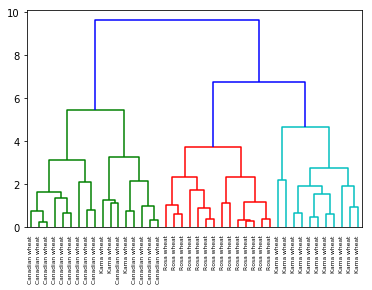

In [1]:
import numpy as np
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

samples = np.array([[ 14.88  ,  14.57  ,   0.8811,   5.554 ,   3.333 ,   1.018 ,   4.956 ],
       [ 14.69  ,  14.49  ,   0.8799,   5.563 ,   3.259 ,   3.586 ,   5.219 ],
       [ 14.03  ,  14.16  ,   0.8796,   5.438 ,   3.201 ,   1.717 ,   5.001 ],
       [ 13.99  ,  13.83  ,   0.9183,   5.119 ,   3.383 ,   5.234 ,   4.781 ],
       [ 14.11  ,  14.26  ,   0.8722,   5.52  ,   3.168 ,   2.688 ,   5.219 ],
       [ 13.02  ,  13.76  ,   0.8641,   5.395 ,   3.026 ,   3.373 ,   4.825 ],
       [ 15.49  ,  14.94  ,   0.8724,   5.757 ,   3.371 ,   3.412 ,   5.228 ],
       [ 16.2   ,  15.27  ,   0.8734,   5.826 ,   3.464 ,   2.823 ,   5.527 ],
       [ 13.5   ,  13.85  ,   0.8852,   5.351 ,   3.158 ,   2.249 ,   5.176 ],
       [ 15.36  ,  14.76  ,   0.8861,   5.701 ,   3.393 ,   1.367 ,   5.132 ],
       [ 15.78  ,  14.91  ,   0.8923,   5.674 ,   3.434 ,   5.593 ,   5.136 ],
       [ 14.46  ,  14.35  ,   0.8818,   5.388 ,   3.377 ,   2.802 ,   5.044 ],
       [ 11.23  ,  12.63  ,   0.884 ,   4.902 ,   2.879 ,   2.269 ,   4.703 ],
       [ 14.34  ,  14.37  ,   0.8726,   5.63  ,   3.19  ,   1.313 ,   5.15  ],
       [ 16.84  ,  15.67  ,   0.8623,   5.998 ,   3.484 ,   4.675 ,   5.877 ],
       [ 17.32  ,  15.91  ,   0.8599,   6.064 ,   3.403 ,   3.824 ,   5.922 ],
       [ 18.72  ,  16.19  ,   0.8977,   6.006 ,   3.857 ,   5.324 ,   5.879 ],
       [ 18.88  ,  16.26  ,   0.8969,   6.084 ,   3.764 ,   1.649 ,   6.109 ],
       [ 18.76  ,  16.2   ,   0.8984,   6.172 ,   3.796 ,   3.12  ,   6.053 ],
       [ 19.31  ,  16.59  ,   0.8815,   6.341 ,   3.81  ,   3.477 ,   6.238 ],
       [ 17.99  ,  15.86  ,   0.8992,   5.89  ,   3.694 ,   2.068 ,   5.837 ],
       [ 18.85  ,  16.17  ,   0.9056,   6.152 ,   3.806 ,   2.843 ,   6.2   ],
       [ 19.38  ,  16.72  ,   0.8716,   6.303 ,   3.791 ,   3.678 ,   5.965 ],
       [ 18.96  ,  16.2   ,   0.9077,   6.051 ,   3.897 ,   4.334 ,   5.75  ],
       [ 18.14  ,  16.12  ,   0.8772,   6.059 ,   3.563 ,   3.619 ,   6.011 ],
       [ 18.65  ,  16.41  ,   0.8698,   6.285 ,   3.594 ,   4.391 ,   6.102 ],
       [ 18.94  ,  16.32  ,   0.8942,   6.144 ,   3.825 ,   2.908 ,   5.949 ],
       [ 17.36  ,  15.76  ,   0.8785,   6.145 ,   3.574 ,   3.526 ,   5.971 ],
       [ 13.32  ,  13.94  ,   0.8613,   5.541 ,   3.073 ,   7.035 ,   5.44  ],
       [ 11.43  ,  13.13  ,   0.8335,   5.176 ,   2.719 ,   2.221 ,   5.132 ],
       [ 12.01  ,  13.52  ,   0.8249,   5.405 ,   2.776 ,   6.992 ,   5.27  ],
       [ 11.34  ,  12.87  ,   0.8596,   5.053 ,   2.849 ,   3.347 ,   5.003 ],
       [ 12.02  ,  13.33  ,   0.8503,   5.35  ,   2.81  ,   4.271 ,   5.308 ],
       [ 12.44  ,  13.59  ,   0.8462,   5.319 ,   2.897 ,   4.924 ,   5.27  ],
       [ 11.55  ,  13.1   ,   0.8455,   5.167 ,   2.845 ,   6.715 ,   4.956 ],
       [ 11.26  ,  13.01  ,   0.8355,   5.186 ,   2.71  ,   5.335 ,   5.092 ],
       [ 12.46  ,  13.41  ,   0.8706,   5.236 ,   3.017 ,   4.987 ,   5.147 ],
       [ 11.81  ,  13.45  ,   0.8198,   5.413 ,   2.716 ,   4.898 ,   5.352 ],
       [ 11.27  ,  12.86  ,   0.8563,   5.091 ,   2.804 ,   3.985 ,   5.001 ],
       [ 12.79  ,  13.53  ,   0.8786,   5.224 ,   3.054 ,   5.483 ,   4.958 ],
       [ 12.67  ,  13.32  ,   0.8977,   4.984 ,   3.135 ,   2.3   ,   4.745 ],
       [ 11.23  ,  12.88  ,   0.8511,   5.14  ,   2.795 ,   4.325 ,   5.003 ]])

varietes = ['Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat',
            'Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat','Kama wheat',
            'Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat',
            'Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat','Rosa wheat',
            'Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat',
            'Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat',
            'Canadian wheat','Canadian wheat','Canadian wheat','Canadian wheat']

#Calculamos el linkage:
mergins = linkage(samples, method = 'complete')
#Ploteamos el dendrograma
dendrogram(mergins,
          labels = varietes,
          leaf_rotation = 90,
          leaf_font_size = 6)
plt.show()

Los dendrogramas son una buena forma de ilustrar la disposición de los clusters producidos en un clustering jerárquico.

# Hierarchies of stocks

A continuación vamos a proceder a aplicar clustering jerárquico al conjunto de datos sobre las acciones de diferentes empresas.

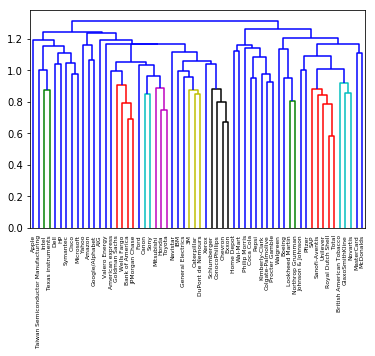

In [2]:
#Cargamos los datos
import pandas as pd
from sklearn.preprocessing import normalize
df = pd.read_csv('stock.csv')
movements = df.drop('Unnamed: 0', axis = 1).values
companies = df['Unnamed: 0'].values

#Normalizamos
movements = normalize(movements)
#Nos creamos el linkage
mergigns = linkage(movements, method = 'complete')
#Ploteamos en dendrograma
dendrogram(mergigns,
          labels = companies,
          leaf_rotation = 90,
          leaf_font_size = 6)
plt.show()

La elección de un método u otro a la hora de realizar el linkage provoca distinta jerarquía de clusters.

# TSNE

TSNE se trata de un algoritmo que nos permite reducir la dimensionalidad de los datos, se trata de una técnica de reducción de dimensionalidad no lineal que es particularmente adecuada para incorporar datos de alta dimensionalidad en un espacio de dos o tres dimensiones, el cual puede ser visualizado mediante un scatter plot. Lo que hace es modelar cada objeto de alta dimensionalidad por un punto de dos o tres dimensiones de tal manera que objetos similares se modelan por puntos cercanos y objetos diferentes se modelan por puntos diferentes. A continuación veremos un ejemplo

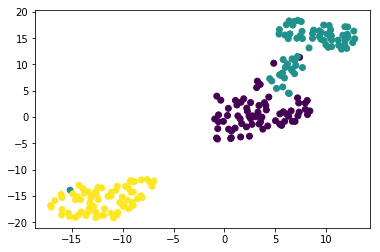

In [31]:
from sklearn.manifold import TSNE
samples = pd.read_csv('seeds.csv')
varietes = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,
 1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,
 2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,
 3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3]
#Nos creamos el TSNE
model = TSNE(learning_rate = 200)
#Hacemos el fit y el transform con los datos
tsne_features = model.fit_transform(samples)
#Seleccionamos las dos componentes de tsne_features
xs = tsne_features[:,0]
ys = tsne_features[:,1]
# Scatter plot, coloring by variety_numbers
plt.scatter(xs, ys, c = varietes)
plt.show()

TSNE nos proporciona de excelentes visualizaciones cuando los ejemplos individuales pueden ser etiquetados. A continuación aplicaremos TSNE al dataset de stocks. Un scatter plot de las características resultantes de aplicar TSNE etiquetadas con los nombres de las compañías nos proporciona un mapa de la bolsa de valores.

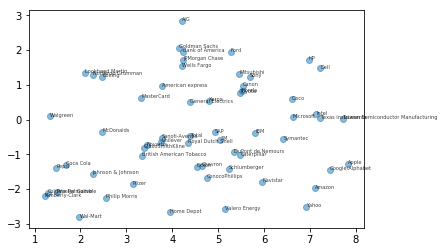

In [36]:
from sklearn.preprocessing import Normalizer
#Cargamos los datos
df = pd.read_csv('stock.csv')
samples = df.drop('Unnamed: 0', axis = 1).values
companies = df['Unnamed: 0'].values
#Nos creamos el TSNE
normalizer = Normalizer()
model = TSNE(learning_rate = 50)
#Fijamos y transformamos
samples_norm = normalizer.fit_transform(samples)
features_tsne = model.fit_transform(samples_norm)
#Seleccionamos
xs = features_tsne[:,0]
ys = features_tsne[:,1]
#Nos creamos el scatter
_ = plt.scatter(xs, ys, alpha = 0.5)
#Ponemos los nombres a cada uno de los puntos de la compañía que representa
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=5, alpha=0.75)
plt.show()

Ahora podemos ver de forma más clara los distinton clusters que podemos hacer con las empresas.